# Лабораторна робота No6
## Застосування numpy
### ФБ-25 Ярош Костянтин
<b> Мета роботи:</b> отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.
### Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

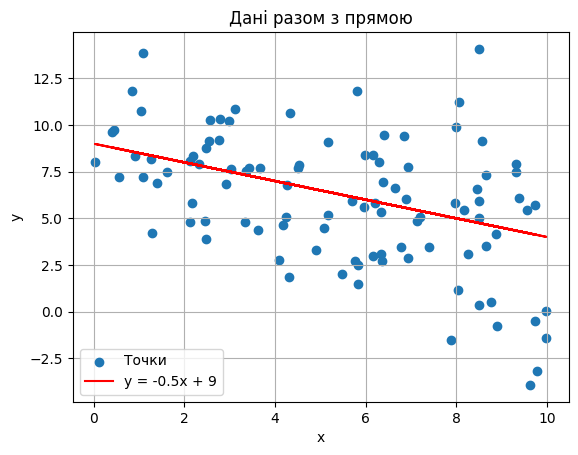

In [16]:
k = -0.5
b = 9

num_points = 100

x = np.random.uniform(0, 10, num_points)

noise = np.random.normal(0, 3, num_points)

y = k * x + b + noise

plt.scatter(x, y, label='Точки')
plt.plot(x, k * x + b, color='red', label=f'y = {k}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Дані разом з прямою')
plt.legend()
plt.grid(True)
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок $\hat{k}$ та $\hat{b}$.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).


In [17]:
def least_squares_method(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_xy = np.mean(x * y)
    mean_xx = np.mean(x * x)
    
    k_hat = (mean_xy - mean_x * mean_y) / (mean_xx - mean_x ** 2) #Коефіцієнт нахилу
    b_hat = (mean_y - k_hat * mean_x) #Коефіцієнт зміщення
    
    return k_hat, b_hat

k_hat, b_hat = least_squares_method(x, y)

k_np_polyfit, b_np_polyfit = np.polyfit(x, y, 1)

print("Параметри справжньої прямої:")
print("k =", k)
print("b =", b)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("k_hat =", k_hat)
print("b_hat =", b_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("k_np_polyfit =", k_np_polyfit)
print("b_np_polyfit =", b_np_polyfit)

Параметри справжньої прямої:
k = -0.5
b = 9

Оцінки параметрів за методом найменших квадратів:
k_hat = -0.5891982160250653
b_hat = 9.167390572088058

Оцінки параметрів за np.polyfit:
k_np_polyfit = -0.5891982160250636
b_np_polyfit = 9.167390572088049


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

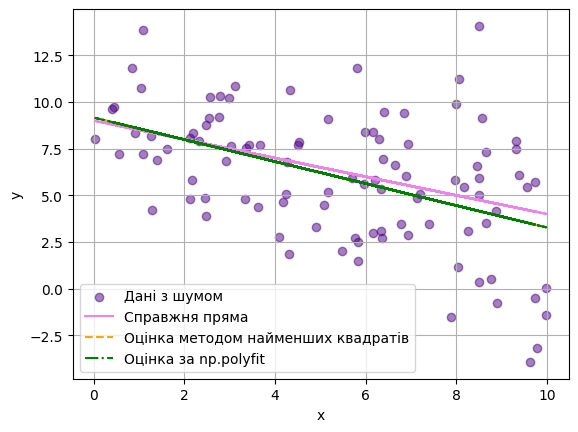

In [18]:
plt.scatter(x, y, label='Дані з шумом', color='indigo', alpha=0.5)
plt.plot(x, k * x + b, color='violet', label='Справжня пряма')
plt.plot(x, k_hat * x + b_hat, color='orange', linestyle='dashed', label='Оцінка методом найменших квадратів')
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='green', linestyle='-.', label='Оцінка за np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок $\hat{k}$ та $\hat{b}$. Визначіть оптимальні вхідні параметри: learning_rate, n_iter


In [19]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k_hat = 0
    b_hat = 0
    n = len(x)
    
    for _ in range(n_iter):
        d_k = (2/n) * np.sum(x * (y - (k_hat*x + b_hat)))
        d_b = (2/n) * np.sum(y - (k_hat*x + b_hat))
        
        k_hat += learning_rate * d_k
        b_hat += learning_rate * d_b
    
    return k_hat, b_hat

k_hat_gradient, b_hat_gradient = gradient_descent(x, y)
print("Оцінки параметрів за методом градієнтного спуску:")
print("k_hat_gradient =", k_hat_gradient)
print("b_hat_gradient =", b_hat_gradient)


Оцінки параметрів за методом градієнтного спуску:
k_hat_gradient = -0.5699478130151234
b_hat_gradient = 9.035896986337775


2. Додайте отриману лінію регресії на загальний графік

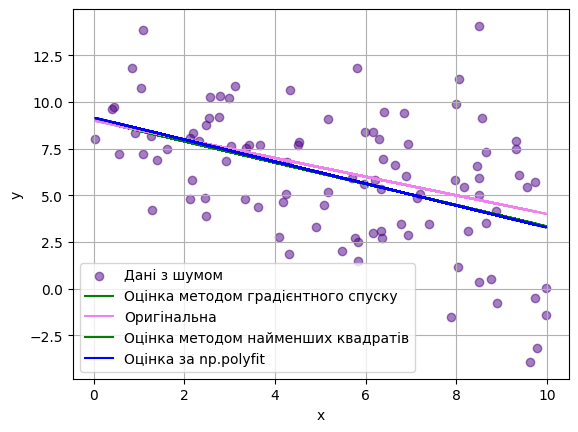

In [20]:

plt.scatter(x, y, label='Дані з шумом', color='indigo', alpha=0.5)

plt.plot(x, k_hat_gradient * x + b_hat_gradient, color='green', label='Оцінка методом градієнтного спуску')
plt.plot(x, k * x + b, color='violet', label='Оригінальна')
plt.plot(x, k_hat * x + b_hat, color='green', label='Оцінка методом найменших квадратів')
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='blue', label='Оцінка за np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

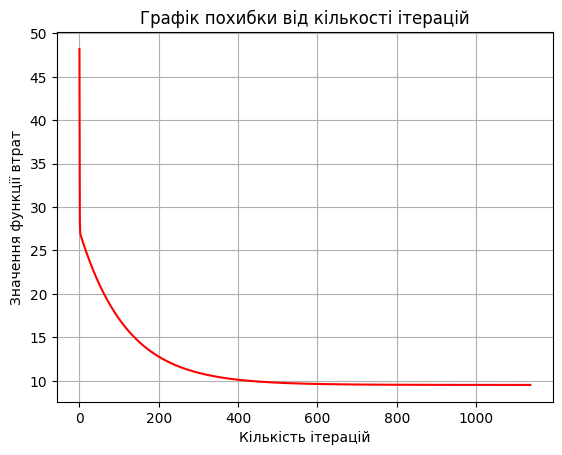

In [27]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=10000):
    k = 0
    b = 0
    loss_values = []

    for i in range(n_iter):
        y_pred = k * x + b
        loss = np.mean((y_pred - y) ** 2)
        if loss_values and abs(loss_values[-1] - loss) < 0.00001 :
            loss_values.append(loss)
            return loss_values
        loss_values.append(loss)
        

        dk = np.sum(2 * (y_pred - y) * x) / x.size
        db = np.sum(2 * (y_pred - y)) / x.size

        k -= learning_rate * dk
        b -= learning_rate * db

    return loss_values

loss_values = gradient_descent(x, y)
plt.plot(range(len(loss_values)), loss_values, color='red')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Значення функції втрат')
plt.title('Графік похибки від кількості ітерацій')
plt.grid(True)
plt.show()


